In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
# Load dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Mencari missing value dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **1 - Analisa Descriptive Statistic**

## 1.1 Rata-rata umur pengguna

In [5]:
print(f"Rata-rata umur pengguna adalah {data.age.mean():.2f}")

Rata-rata umur pengguna adalah 39.21


In [6]:
def plot_distribusi(dataframe, column_name):
    sns.histplot(dataframe[column_name], kde=False)
    plt.axvline(x=np.mean(dataframe[column_name]), linewidth=2, linestyle= '--', color='red', label='rata-rata')
    plt.axvline(x=np.median(dataframe[column_name]), linewidth=2, linestyle= '--', color='green', label='median')
    plt.title('Distribusi {}'.format(column_name))
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

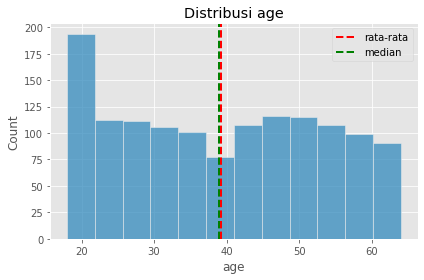

In [7]:
plot_distribusi(data, 'age')

## 1.2 Rata-rata nilai BMI pengguna

In [8]:
print(f"Rata-rata nilai BMI dari pengguna adalah {data.bmi.mean():.2f}")

Rata-rata nilai BMI dari pengguna adalah 30.66


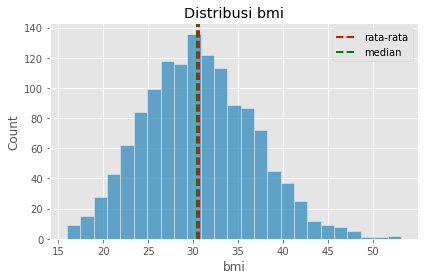

In [9]:
plot_distribusi(data, 'bmi')

## 1.3 Rata-rata tagihan pengguna

In [10]:
print(f"Rata-rata tagihan dari pengguna adalah {data.charges.mean():.2f}")

Rata-rata tagihan dari pengguna adalah 13270.42


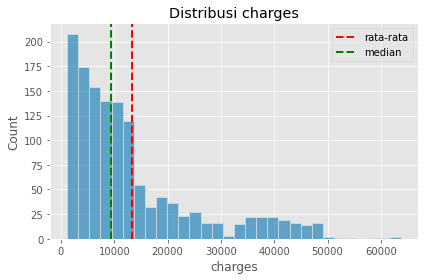

In [11]:
plot_distribusi(data, 'charges')

## 1.4 Apakah variansi dari data charges perokok dan non perokok sama?

In [12]:
# Filter data perokok dan non perokok
smoker = data.loc[data.smoker == 'yes']
non_smoker = data.loc[data.smoker == 'no']

In [13]:
print(f"Variansi tagihan dari pengguna yang merokok adalah {smoker.charges.var():.2f}")

Variansi tagihan dari pengguna yang merokok adalah 133207311.21


In [14]:
print(f"Variansi tagihan dari pengguna yang tidak merokok adalah {non_smoker.charges.var():.2f}")

Variansi tagihan dari pengguna yang tidak merokok adalah 35925420.50


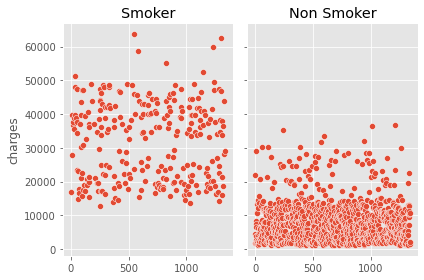

In [15]:
# Membuat distribusi tagihan perokok dan non perokok
cols = ['yes', 'no']

fig, axes = plt.subplots(1,2, sharey='row')

axes = axes.ravel()

for col, ax in zip(cols, axes):
  sns.scatterplot(data=data.charges.loc[data.smoker == col], ax=ax)

axes[0].set_title('Smoker')
axes[1].set_title('Non Smoker')

fig.tight_layout()
plt.show()

In [16]:
def small_multiple_figure_distrribusi_1_2(cols, data, column_name, fliter_column):
    """
    cols: list of condition
    data: dataframe
    column_name: nama kolom yang akan dicari distribusinya
    filter_column: nama kolom yang akan di filter
    """
    fig, axes = plt.subplots(1,2, sharey='row' ,figsize=(8,5))

    axes = axes.ravel()

    for col, ax in zip(cols, axes):
      sns.histplot(data=data[column_name].loc[data[fliter_column] == col], ax=ax)

    axes[0].set_title('{}\n mean: {}'.format(cols[0], round(np.mean(data[column_name].loc[data[fliter_column] == cols[0]]),2)))
    axes[1].set_title('{}\n mean: {}'.format(cols[1], round(np.mean(data[column_name].loc[data[fliter_column] == cols[1]]),2)))
    
    axes[0].axvline(x=np.mean(data[column_name].loc[data[fliter_column] == cols[0]]), lw=4, ls='--', color='red', label='rata-rata')
    axes[0].axvline(x=np.median(data[column_name].loc[data[fliter_column] == cols[0]]), lw=4, ls='--', color='green', label='median')
    
    axes[1].axvline(x=np.mean(data[column_name].loc[data[fliter_column] == cols[1]]), lw=4, ls='--', color='red', label='rata-rata')
    axes[1].axvline(x=np.median(data[column_name].loc[data[fliter_column] == cols[1]]), lw=4, ls='--', color='green', label='median')

    fig.tight_layout()
    plt.legend()
    plt.show()

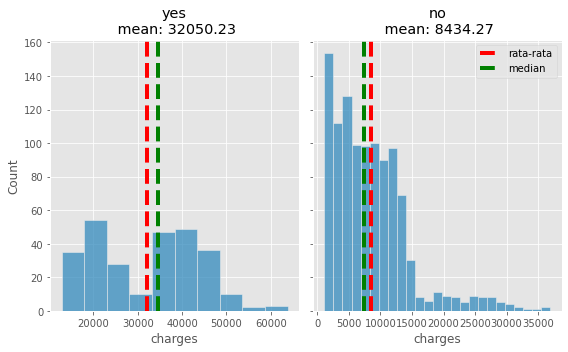

In [17]:
small_multiple_figure_distrribusi_1_2(['yes', 'no'], data, 'charges', 'smoker')

## 1.5 Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [18]:
print(f"Rata-rata umur perempuan yang merokok adalah {smoker.age.loc[data.sex == 'female'].mean():.2f}")

Rata-rata umur perempuan yang merokok adalah 38.61


In [19]:
print(f"Rata-rata umur laki-laki yang merokok adalah {smoker.age.loc[data.sex == 'male'].mean():.2f}")

Rata-rata umur laki-laki yang merokok adalah 38.45


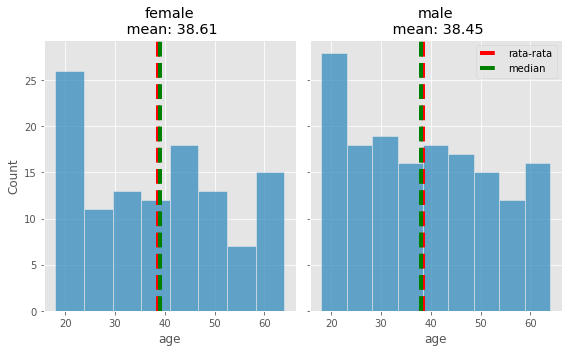

In [20]:
small_multiple_figure_distrribusi_1_2(['female','male'], smoker, 'age', 'sex')

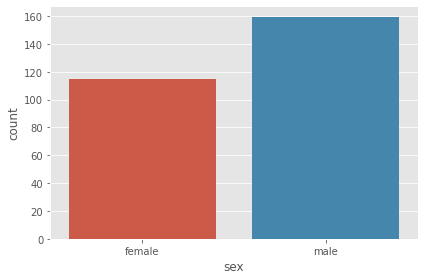

In [21]:
# Melihat countplot gender dari seorang perokok
sns.countplot(x='sex', data=smoker)

plt.tight_layout()
plt.show()

## 1.6 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [22]:
print(f'Rata-rata tagihan kesehatan perokok adalah {smoker.charges.mean():.2f}')

Rata-rata tagihan kesehatan perokok adalah 32050.23


In [23]:
print(f"Rata-rata tagihan kesehatan non perokok adalah {non_smoker.charges.mean():.2f}")

Rata-rata tagihan kesehatan non perokok adalah 8434.27


In [24]:
print(f'Median tagihan kesehatan perokok adalah {smoker.charges.median():.2f}')

Median tagihan kesehatan perokok adalah 34456.35


In [25]:
print(f"Rata-rata tagihan kesehatan non perokok adalah {non_smoker.charges.median():.2f}")

Rata-rata tagihan kesehatan non perokok adalah 7345.41


## 1.7 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [26]:
avg_charges_smoker_with_bmi_above_25 = smoker.charges.loc[smoker.bmi > 25].mean()

In [27]:
print(f"Rata-rata tagihan kesehatan perokok yang BMI nya di atas 25 adalah {avg_charges_smoker_with_bmi_above_25:.2f}")

Rata-rata tagihan kesehatan perokok yang BMI nya di atas 25 adalah 35116.91


In [28]:
avg_charges_non_smoker_with_bmi_above_25 = non_smoker.charges.loc[non_smoker.bmi > 25].mean()

In [29]:
print(f"Rata-rata tagihan kesehatan non perokok yang BMI nya di atas 25 adalah {avg_charges_non_smoker_with_bmi_above_25}")

Rata-rata tagihan kesehatan non perokok yang BMI nya di atas 25 adalah 8629.589609712157


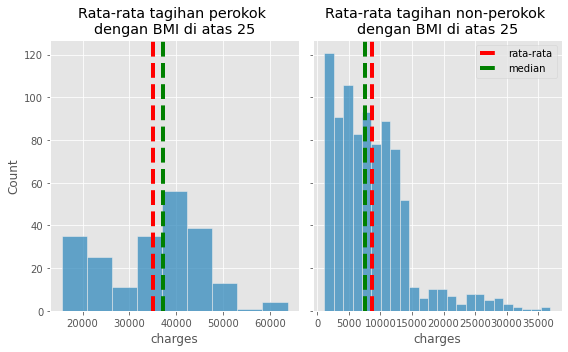

In [30]:
figure, axes = plt.subplots(1,2, sharey='row',figsize=(8,5))

sns.histplot(smoker.charges.loc[smoker.bmi > 25], ax=axes[0])
sns.histplot(non_smoker.charges.loc[non_smoker.bmi > 25], ax=axes[1])

axes[0].axvline(x=np.mean(smoker.charges.loc[smoker.bmi > 25]), lw=4, ls='--', color='red', label='rata-rata')
axes[0].axvline(x=np.median(smoker.charges.loc[smoker.bmi > 25]), lw=4, ls='--', color='green', label='median')
    
axes[1].axvline(x=np.mean(non_smoker.charges.loc[non_smoker.bmi > 25]), lw=4, ls='--', color='red', label='rata-rata')
axes[1].axvline(x=np.median(non_smoker.charges.loc[non_smoker.bmi > 25]), lw=4, ls='--', color='green', label='median')

axes[0].set_title('Rata-rata tagihan perokok \ndengan BMI di atas 25')
axes[1].set_title('Rata-rata tagihan non-perokok \ndengan BMI di atas 25')

plt.tight_layout()
plt.legend()
plt.show()


## 1.8 BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [31]:
# Filter data berdasarkan gender
data_laki_laki = data.loc[data.sex == 'male']
data_perempuan = data.loc[data.sex == 'female']

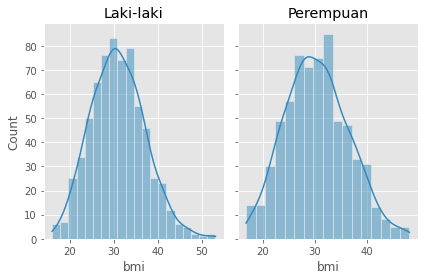

In [32]:
# Melihat distribusi BMI berdasarkan gender
cols = ['male', 'female']

fig, axes = plt.subplots(1,2, sharey='row')

axes = axes.ravel()

for col, ax in zip(cols, axes):
  sns.histplot(data=data.bmi.loc[data.sex == col], kde=True, ax=ax)

axes[0].set_title('Laki-laki')
axes[1].set_title('Perempuan')

plt.tight_layout()
plt.show()

In [33]:
print(f"Nilai BMI Maksimun pada seorang laki-laki adalah {data_laki_laki.bmi.max()}")

Nilai BMI Maksimun pada seorang laki-laki adalah 53.13


In [34]:
print(f"Nilai BMI Maksimum pada seorang perempuan adalah {data_perempuan.bmi.max()}")

Nilai BMI Maksimum pada seorang perempuan adalah 48.07


## 1.9 BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

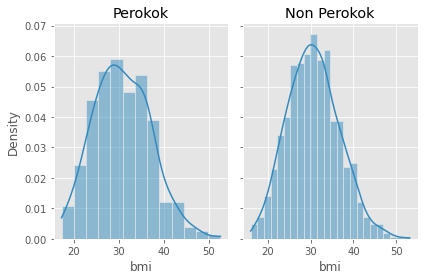

In [35]:
# Melihat distribusi BMI berdasarkan perokok dan non perokok
cols = ['yes', 'no']

fig, axes = plt.subplots(1,2, sharey='row')

axes = axes.ravel()

for col, ax in zip(cols, axes):
  sns.histplot(data=data.bmi.loc[data.smoker == col], kde=True, stat='density', ax=ax)

axes[0].set_title('Perokok')
axes[1].set_title('Non Perokok')

plt.tight_layout()
plt.show()

In [36]:
print(f"Nilai BMI Maksimum pada seorang perokok adalah {smoker.bmi.max()}")

Nilai BMI Maksimum pada seorang perokok adalah 52.58


In [37]:
print(f"Nilai BMI Maksimum pada seorang non perokok adalah {non_smoker.bmi.max()}")

Nilai BMI Maksimum pada seorang non perokok adalah 53.13


# 2 - Analisa Variabel Kategorik (PMF)

# 2.1 Gender mana yang memiliki tagihan paling tinggi?

In [38]:
# p(A) = Peluang tagihan Laki-laki
# p(b) = Peluang tagihan Perempuan

n_data =  len(data)
n_data

1338

In [39]:
p_A = len(data.charges.loc[data.sex == 'male']) / n_data

print(f"Peluang tagihan pada laki-laki adalah: {p_A:.3f}")

Peluang tagihan pada laki-laki adalah: 0.505


In [40]:
p_B = len(data.charges.loc[data.sex == 'female']) / n_data
print(f"Peluang tagihan pada perempuan adalah: {p_B: .3f}")

Peluang tagihan pada perempuan adalah:  0.495


In [41]:
print(f"Total tagihan pada laki-laki adalah: {data.charges.loc[data.sex == 'male'].sum():.2f}")
print(f"Total tagihan pada perempuan adalah: {data.charges.loc[data.sex == 'female'].sum():.2f}")
print(f"Total tagihan adalah: {data.charges.sum():.2f}")

Total tagihan pada laki-laki adalah: 9434763.80
Total tagihan pada perempuan adalah: 8321061.19
Total tagihan adalah: 17755824.99


In [42]:
# Peluang tagihan pada laki-laki
data.charges.loc[data.sex == 'male'].sum() / data.charges.sum()

0.5313616123751114

In [43]:
# Peluang tagihan pada perempuan
data.charges.loc[data.sex == 'female'].sum() / data.charges.sum()

0.4686383876248886

# 2.2 Distribusi peluang tagihan di tiap-tiap region

In [44]:
# Melihat terdapat region apa saja dalam data
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [45]:
p_southwest = len(data.charges.loc[data.region == 'southwest']) / n_data
print(f"Peluang tagihan di Region Southwest adalah: {p_southwest:.3f}")

Peluang tagihan di Region Southwest adalah: 0.243


In [46]:
p_southeast = len(data.charges.loc[data.region == 'southeast']) / n_data
print(f"Peluang tagihan di Region Southeast adalah: {p_southeast:.3f}")

Peluang tagihan di Region Southeast adalah: 0.272


In [47]:
p_northwest = len(data.charges.loc[data.region == 'northwest']) / n_data
print(f"Peluang tagihan di Region Northwest adalah: {p_northwest:.3f}")

Peluang tagihan di Region Northwest adalah: 0.243


In [48]:
p_northeast = len(data.charges.loc[data.region == 'northeast']) / n_data
print(f"Peluang tagihan di Region Northeast adalah: {p_northeast:.3f}")

Peluang tagihan di Region Northeast adalah: 0.242


In [49]:
# Total probabilitas semua region
total_probability_region = p_southwest + p_southeast + p_northwest + p_northeast
total_probability_region

1.0

# 2.3 Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [50]:
# Filter jumlah data tiap region
n_data_northwest = len(data.charges.loc[data.region == 'northwest'])
n_data_northeast = len(data.charges.loc[data.region == 'northeast'])
n_data_southwest = len(data.charges.loc[data.region == 'southwest'])
n_data_southeast = len(data.charges.loc[data.region == 'southeast'])

In [51]:
print(f"Jumlah data pada region Southwest adalah {n_data_southwest}")
print(f"Jumlah data pada region Southeast adalah {n_data_southeast}")
print(f"Jumlah data pada region Northwest adalah {n_data_northwest}")
print(f"Jumlah data pada region Northeast adalah {n_data_northeast}")

Jumlah data pada region Southwest adalah 325
Jumlah data pada region Southeast adalah 364
Jumlah data pada region Northwest adalah 325
Jumlah data pada region Northeast adalah 324


In [52]:
# Total data semua region
total_data_region = n_data_southeast + n_data_southwest + n_data_northwest + n_data_northeast
total_data_region

1338

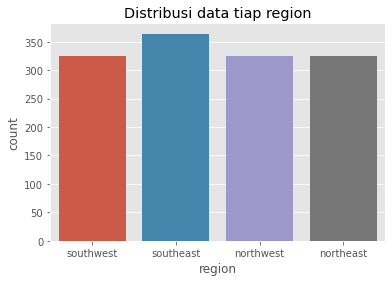

In [53]:
# Melihat distribusi data tiap region
sns.countplot(data=data, x='region')
plt.title('Distribusi data tiap region')
plt.show()

# 2.4 Mana yang lebih tinggi proporsi perokok atau non perokok?

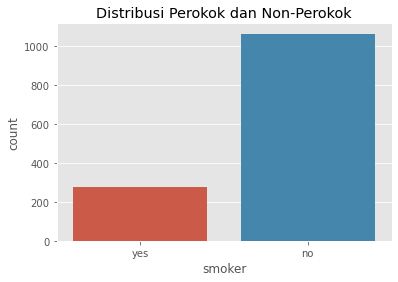

In [54]:
# Melihat frekuensi data kemunculan perokok dan non perokok
sns.countplot(data=data, x='smoker')
plt.title('Distribusi Perokok dan Non-Perokok')
plt.show()

In [55]:
print(f"Probabilitas seorang perokok adalah {len(data.smoker.loc[data.smoker == 'yes']) / n_data:.3f}")
print(f"Probabilitas seorang non perokok adalah {len(data.smoker.loc[data.smoker == 'no']) / n_data:.3f}")

Probabilitas seorang perokok adalah 0.205
Probabilitas seorang non perokok adalah 0.795


# 2.5 Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [56]:
# Irisan perokok dan perempuan
p_perempuan_intersection_perokok = len(data.loc[(data.sex == 'female') & (data.smoker == 'yes')]) / n_data

In [57]:
p_perempuan_intersection_perokok

0.08594917787742899

In [58]:
# Peluang perokok
p_perokok = len(data.smoker.loc[data.smoker == 'yes']) / n_data

In [59]:
p_perokok

0.20478325859491778

In [60]:
# Conditional Probability
p_perempuan_given_perokok = p_perempuan_intersection_perokok / p_perokok

In [61]:
print(f"Peluang seorang perempuan jika diketahui dia seorang perokok adalah {p_perempuan_given_perokok:.4f}")

Peluang seorang perempuan jika diketahui dia seorang perokok adalah 0.4197


# 2.6 Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [62]:
# Irisan perokok dan laki-laki
p_laki_laki_intersection_perokok = len(data.loc[(data.sex == 'male') & (data.smoker == 'yes')]) / n_data

In [63]:
# Conditional Probability
p_laki_laki_given_perokok = p_laki_laki_intersection_perokok / p_perokok

In [64]:
print(f"Peluang seorang laki-laki jika diketahui dia seorang perokok adalah {p_laki_laki_given_perokok:.4f}")

Peluang seorang laki-laki jika diketahui dia seorang perokok adalah 0.5803


# 2.7 Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

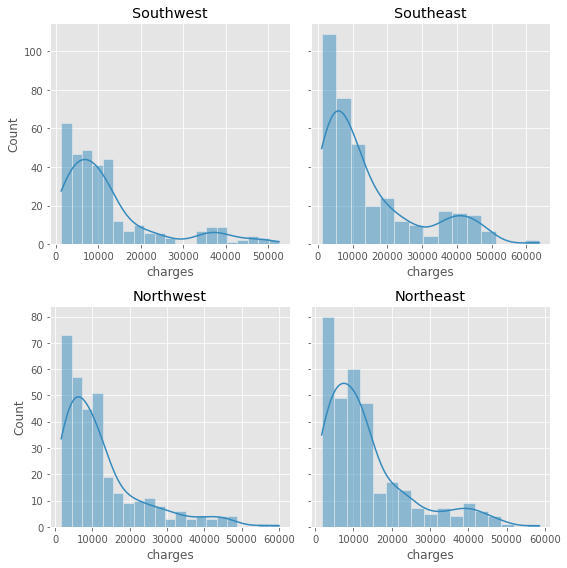

In [65]:
# Distribusu tagihan pada tiap region
cols = ['southwest', 'southeast', 'northwest', 'northeast']

fig, axes = plt.subplots(2,2, sharey='row' ,figsize=(8,8))

axes = axes.ravel()

for col, ax in zip(cols, axes):
  sns.histplot(data=data.charges.loc[data.region == col], kde=True, ax=ax)

axes[0].set_title('Southwest')
axes[1].set_title('Southeast')
axes[2].set_title('Northwest')
axes[3].set_title('Northeast')

plt.tight_layout()
plt.show()

# 3 - Analisa Variabel Kontinu (CDF)

## 3.1 Berapa peluang seseorang diambil secara acak jika nilai BMI di atas 25

In [66]:
# Probability  seorang perokok dengan BMI di atas 25
# Import library yang diperlukan
from scipy.stats import norm
import numpy as np

mean_bmi = np.mean(data.bmi)
var_bmi = np.var(data.bmi)
std_bmi = np.sqrt(var_bmi)

print(f"Nilai Rata-rata BMI: {mean_bmi:.2f}")
print(f"Nilai Varians BMI: {var_bmi:.2f}")
print(f"Nilai Standard Deviasi BMI: {std_bmi:.2f}")

Nilai Rata-rata BMI: 30.66
Nilai Varians BMI: 37.16
Nilai Standard Deviasi BMI: 6.10


In [67]:
x = 25
p_bmi = 1 - norm.cdf(x, mean_bmi, std_bmi)
print(f"Probability seorang dengan BMI di atas 25 adalah {p_bmi:.2%}")

Probability seorang dengan BMI di atas 25 adalah 82.36%


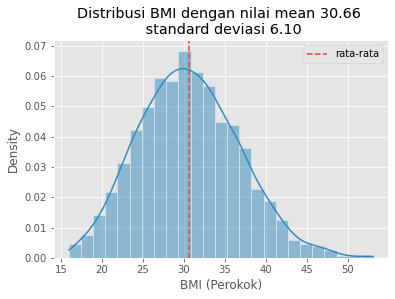

In [68]:
sns.histplot(data.bmi, kde=True, stat='density')
plt.xlabel("BMI (Perokok)")
plt.title(f"Distribusi BMI dengan nilai mean {mean_bmi:.2f} \n standard deviasi {std_bmi:.2f}")
plt.axvline(x=mean_bmi, ls='--' ,label='rata-rata')
plt.legend()
plt.show()

## 3.2 Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k

In [69]:
mean_charges = np.mean(data.charges)
var_charges = np.var(data.charges)
std_charges = np.sqrt(var_charges)

print(f"Nilai Rata-rata tagihan: {mean_charges:.2f}")
print(f"Nilai varians tagihan: {var_charges:.2f}")
print(f"Nilai standard deviasi tagihan: {std_charges:.2f}")

Nilai Rata-rata tagihan: 13270.42
Nilai varians tagihan: 146542766.49
Nilai standard deviasi tagihan: 12105.48


In [70]:
x = 16700

p_charges_above_16k = 1 - norm.cdf(x, mean_charges, std_charges)
print(f"Probabilitas seseorang dengan tagihan di atas 16.7k: {p_charges_above_16k:.2%}")

Probabilitas seseorang dengan tagihan di atas 16.7k: 38.85%


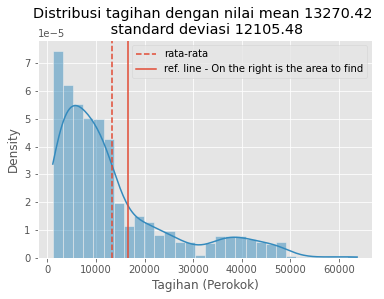

In [71]:
sns.histplot(data.charges, kde=True, stat='density')
plt.xlabel("Tagihan (Perokok)")
plt.title(f"Distribusi tagihan dengan nilai mean {mean_charges:.2f} \n standard deviasi {std_charges:.2f}")
plt.axvline(x=mean_charges, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

## 3.3 Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [72]:
mean_charges_smoker_bmi_above_25 = np.mean(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)])
var_charges_smoker_bmi_above_25 = np.var(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)])
std_charges_smoker_bmi_above_25 = np.sqrt(var_charges_smoker_bmi_above_25)

print(f"Nilai rata-rata tagihan seorang perokok dengan BMI di atas 25: {mean_charges_smoker_bmi_above_25:.2f}")
print(f"Nilai varians tagihan seorang perokok dengan BMI di atas 25: {var_charges_smoker_bmi_above_25:.2f}")
print(f"Nilai standard deviasi tagihan seorang perokok dengan BMI di atas 25: {std_charges_smoker_bmi_above_25:.2f}")

Nilai rata-rata tagihan seorang perokok dengan BMI di atas 25: 35116.91
Nilai varians tagihan seorang perokok dengan BMI di atas 25: 114021780.45
Nilai standard deviasi tagihan seorang perokok dengan BMI di atas 25: 10678.10


In [73]:
x = 16700

p_charges_above_16k_smoker_bmi_above_25 = 1 - norm.cdf(x, mean_charges_smoker_bmi_above_25, std_charges_smoker_bmi_above_25)
print(f"Nilai Probailitas seorang perokok dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah {p_charges_above_16k_smoker_bmi_above_25:.2%}")

Nilai Probailitas seorang perokok dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah 95.77%


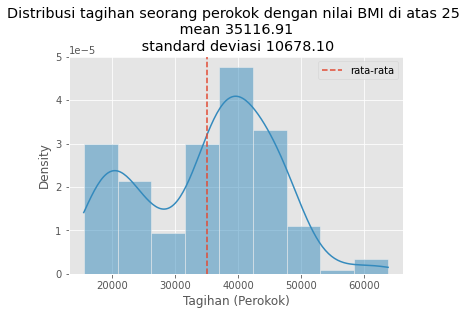

In [74]:
sns.histplot(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)], kde=True, stat='density')
plt.xlabel("Tagihan (Perokok)")
plt.title(f"Distribusi tagihan seorang perokok dengan nilai BMI di atas 25 \n mean {mean_charges_smoker_bmi_above_25:.2f} \n standard deviasi {std_charges_smoker_bmi_above_25:.2f}")
plt.axvline(x=mean_charges_smoker_bmi_above_25, ls='--', label='rata-rata')
plt.legend()
plt.show()

## 3.5 Mana yang lebih mungkin terjadi

### a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau

In [75]:
mean_bmi_above_25 = np.mean(data.charges.loc[data.bmi > 25])
var_bmi_above_25 = np.var(data.charges.loc[data.bmi > 25])
std_bmi_above_25 = np.sqrt(var_bmi_above_25)

print(f"Nilai Rata-rata tagihan seseorang dengan BMI di atas 25 adalah {mean_bmi_above_25:.2f}")
print(f"Nilai varians tagihan sesorang dengan BMI di atas 25 adalah {var_bmi_above_25:.2f}")
print(f"Nilai standard variasi tagihan seseorang dengan BMI di atas 25 adalah {std_bmi_above_25:.2f}")

Nilai Rata-rata tagihan seseorang dengan BMI di atas 25 adalah 13946.48
Nilai varians tagihan sesorang dengan BMI di atas 25 adalah 164579189.52
Nilai standard variasi tagihan seseorang dengan BMI di atas 25 adalah 12828.84


In [76]:
x = 16700
p_above_16_7k_bmi_above_25 = 1 - norm.cdf(x, mean_bmi_above_25, std_bmi_above_25)

print(f"Nilai probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah {p_above_16_7k_bmi_above_25:.2%}")

Nilai probabilitas seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 41.50%


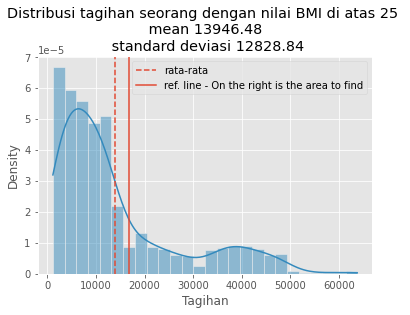

In [77]:
sns.histplot(data.charges.loc[data.bmi > 25], kde=True, stat='density')
plt.xlabel("Tagihan")
plt.title(f"Distribusi tagihan seorang dengan nilai BMI di atas 25 \n mean {mean_bmi_above_25:.2f} \n standard deviasi {std_bmi_above_25:.2f}")
plt.axvline(x=mean_bmi_above_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

### b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

In [78]:
mean_below_25 = np.mean(data.charges.loc[data.bmi < 25])
var_below_25 = np.var(data.charges.loc[data.bmi < 25])
std_below_25 = np.sqrt(var_below_25)

print(f"Nilai Rata-rata tagihan seseorang dengan BMI di atas 25 adalah {mean_below_25:.2f}")
print(f"Nilai varians tagihan sesorang dengan BMI di atas 25 adalah {var_below_25:.2f}")
print(f"Nilai standard variasi tagihan seseorang dengan BMI di atas 25 adalah {std_below_25:.2f}")

Nilai Rata-rata tagihan seseorang dengan BMI di atas 25 adalah 10282.22
Nilai varians tagihan sesorang dengan BMI di atas 25 adalah 56326859.63
Nilai standard variasi tagihan seseorang dengan BMI di atas 25 adalah 7505.12


In [79]:
x = 16700
p_above_16_7k_bmi_below_25 = 1 - norm.cdf(x, mean_below_25, std_below_25)

print(f"Nilai probabilitas seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k adalah {p_above_16_7k_bmi_below_25:.2%}")

Nilai probabilitas seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 19.62%


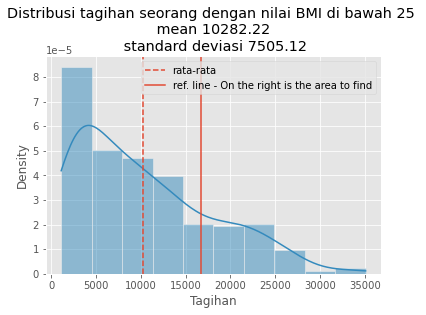

In [80]:
sns.histplot(data.charges.loc[data.bmi < 25], kde=True, stat='density')
plt.xlabel("Tagihan")
plt.title(f"Distribusi tagihan seorang dengan nilai BMI di bawah 25 \n mean {mean_below_25:.2f} \n standard deviasi {std_below_25:.2f}")
plt.axvline(x=mean_below_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

## 3.6 Mana yang lebih mungkin terjadi

### a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,

In [81]:
mean_smoker_bmi_above_25 = np.mean(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)])
var_smoker_bmi_above_25 = np.var(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)])
std_smoker_bmi_above_25 = np.sqrt(var_smoker_bmi_above_25)

print(f"Nilai rata-rata tagihan perokok dengan BMI di atas 25: {mean_smoker_bmi_above_25:.2f}")
print(f"Nilai varians tagihan perokok dengan BMI di atas 25: {var_smoker_bmi_above_25:.2f}")
print(f"Nilai standard variasi tagihan perokok dengan BMI di atas 25: {std_smoker_bmi_above_25:.2f}")

Nilai rata-rata tagihan perokok dengan BMI di atas 25: 35116.91
Nilai varians tagihan perokok dengan BMI di atas 25: 114021780.45
Nilai standard variasi tagihan perokok dengan BMI di atas 25: 10678.10


In [82]:
x = 16700

p_charges_above_16k_smoker_bmi_above_25 = 1 - norm.cdf(x, mean_smoker_bmi_above_25, std_smoker_bmi_above_25)
print(f"Nilai probability seorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah {p_charges_above_16k_smoker_bmi_above_25:.2%}")

Nilai probability seorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 95.77%


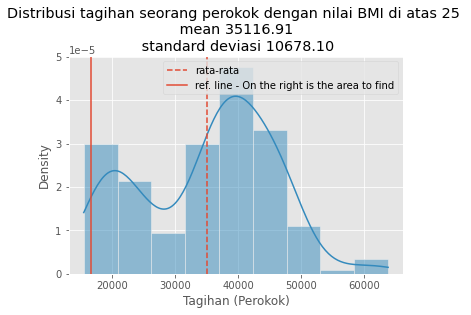

In [83]:
sns.histplot(data.charges.loc[(data.smoker == 'yes') & (data.bmi > 25)], kde=True, stat='density')
plt.xlabel("Tagihan (Perokok)")
plt.title(f"Distribusi tagihan seorang perokok dengan nilai BMI di atas 25 \n mean {mean_charges_smoker_bmi_above_25:.2f} \n standard deviasi {std_charges_smoker_bmi_above_25:.2f}")
plt.axvline(x=mean_charges_smoker_bmi_above_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

### b. Seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k

In [84]:
mean_non_smoker_bmi_above_25 = np.mean(data.charges.loc[(data.smoker == 'no') & (data.bmi > 25)])
var_non_smoker_bmi_above_25 = np.var(data.charges.loc[(data.smoker == 'no') & (data.bmi > 25)])
std_non_smoker_bmi_above_25 = np.sqrt(var_non_smoker_bmi_above_25)

print(f"Nilai rata-rata tagihan perokok dengan BMI di atas 25: {mean_non_smoker_bmi_above_25:.2f}")
print(f"Nilai varians tagihan perokok dengan BMI di atas 25: {var_non_smoker_bmi_above_25:.2f}")
print(f"Nilai standard variasi tagihan perokok dengan BMI di atas 25: {std_non_smoker_bmi_above_25:.2f}")

Nilai rata-rata tagihan perokok dengan BMI di atas 25: 8629.59
Nilai varians tagihan perokok dengan BMI di atas 25: 36446448.06
Nilai standard variasi tagihan perokok dengan BMI di atas 25: 6037.09


In [85]:
x = 16700

p_charges_above_16k_non_smoker_bmi_above_25 = 1 - norm.cdf(x, mean_non_smoker_bmi_above_25, std_non_smoker_bmi_above_25)
print(f"Nilai probabilitas seorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah {p_charges_above_16k_non_smoker_bmi_above_25:.2%}")

Nilai probabilitas seorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 9.06%


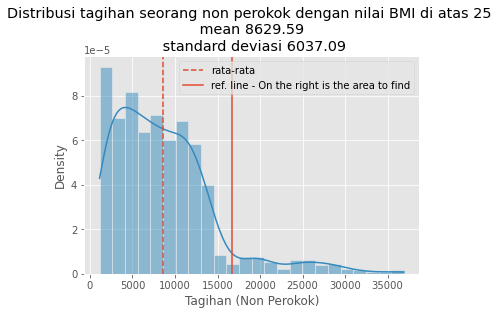

In [86]:
sns.histplot(data.charges.loc[(data.smoker == 'no') & (data.bmi > 25)], kde=True, stat='density')
plt.xlabel("Tagihan (Non Perokok)")
plt.title(f"Distribusi tagihan seorang non perokok dengan nilai BMI di atas 25 \n mean {mean_non_smoker_bmi_above_25:.2f} \n standard deviasi {std_non_smoker_bmi_above_25:.2f}")
plt.axvline(x=mean_non_smoker_bmi_above_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

## 3.7 Mana yang lebih mungkin

### a. Perempuan Non-perokok dengan BMI di atas 25 akan mendapat tagihan kesehatan di atas 16.7k 

In [87]:
mean_non_smoker_female_bmi_above_25 = np.mean(data.charges.loc[(data.sex == 'female') & (data.bmi > 25) & (data.smoker == 'no')])
var_non_smoker_female_bmi_above_25 = np.var(data.charges.loc[(data.sex == 'female') & (data.bmi > 25) & (data.smoker == 'no')])
std_non_smoker_female_bmi_above_25 = np.sqrt(var_non_smoker_female_bmi_above_25)

print(f"Nilai rata-rata tagihan perempuan non perokok dengan BMI di atas 25: {mean_non_smoker_female_bmi_above_25:.2f}")
print(f"Nilai varians tagihan perempuan non smoker dengan BMI di atas 25: {var_non_smoker_female_bmi_above_25:.2f}")
print(f"Nilai standard deviasi perempuan non perokok dengan BMI di atas 25: {std_non_smoker_female_bmi_above_25:.2f}")

Nilai rata-rata tagihan perempuan non perokok dengan BMI di atas 25: 8915.06
Nilai varians tagihan perempuan non smoker dengan BMI di atas 25: 37451311.06
Nilai standard deviasi perempuan non perokok dengan BMI di atas 25: 6119.75


In [88]:
x = 16700

p_charges_above_16k_female_non_smoker_bmi_above_25 = 1 - norm.cdf(x, mean_non_smoker_female_bmi_above_25, std_non_smoker_female_bmi_above_25)
print(f"Nilai probailitas seorang perempuan non smoker dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.7k adalah {p_charges_above_16k_female_non_smoker_bmi_above_25:.2%}")

Nilai probailitas seorang perempuan non smoker dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.7k adalah 10.17%


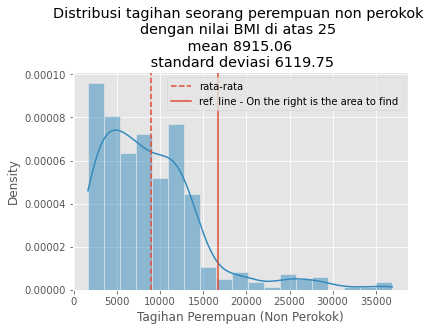

In [89]:
sns.histplot(data.charges.loc[(data.sex == 'female') & (data.bmi > 25) & (data.smoker == 'no')], kde=True, stat='density')
plt.xlabel("Tagihan Perempuan (Non Perokok)")
plt.title(f"Distribusi tagihan seorang perempuan non perokok \ndengan nilai BMI di atas 25 \n mean {mean_non_smoker_female_bmi_above_25:.2f} \n standard deviasi {std_non_smoker_female_bmi_above_25:.2f}")
plt.axvline(x=mean_non_smoker_female_bmi_above_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

### b. Laki-laki Non-perokok dengan BMI di atas 25 akan mendapat tagihan kesehatan di atas 16.7k

In [90]:
mean_non_smoker_male_bmi_above_25 = np.mean(data.charges.loc[(data.sex == 'male') & (data.bmi > 25) & (data.smoker == 'no')])
var_non_smoker_male_bmi_above_25 = np.var(data.charges.loc[(data.sex == 'male') & (data.bmi > 25) & (data.smoker == 'no')])
std_non_smoker_male_bmi_above_25 = np.sqrt(var_non_smoker_male_bmi_above_25)

print(f"Nilai rata-rata tagihan laki-laki non perokok dengan BMI di atas 25: {mean_non_smoker_male_bmi_above_25:.2f}")
print(f"Nilai varians tagihan laki-laki non smoker dengan BMI di atas 25: {var_non_smoker_male_bmi_above_25:.2f}")
print(f"Nilai standard deviasi laki-laki non perokok dengan BMI di atas 25: {std_non_smoker_male_bmi_above_25:.2f}")

Nilai rata-rata tagihan laki-laki non perokok dengan BMI di atas 25: 8327.96
Nilai varians tagihan laki-laki non smoker dengan BMI di atas 25: 35207617.78
Nilai standard deviasi laki-laki non perokok dengan BMI di atas 25: 5933.60


In [91]:
x = 16700

p_charges_above_16k_male_non_smoker_bmi_above_25 = 1 - norm.cdf(x, mean_non_smoker_male_bmi_above_25, std_non_smoker_male_bmi_above_25)
print(f"Nilai probailitas seorang laki-laki non smoker dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.7k adalah {p_charges_above_16k_male_non_smoker_bmi_above_25:.2%}")

Nilai probailitas seorang laki-laki non smoker dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.7k adalah 7.91%


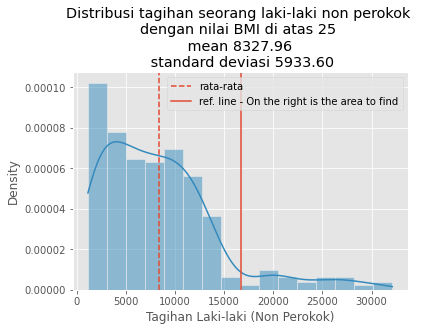

In [92]:
sns.histplot(data.charges.loc[(data.sex == 'male') & (data.bmi > 25) & (data.smoker == 'no')], kde=True, stat='density')
plt.xlabel("Tagihan Laki-laki (Non Perokok)")
plt.title(f"Distribusi tagihan seorang laki-laki non perokok \ndengan nilai BMI di atas 25 \n mean {mean_non_smoker_male_bmi_above_25:.2f} \n standard deviasi {std_non_smoker_male_bmi_above_25:.2f}")
plt.axvline(x=mean_non_smoker_male_bmi_above_25, ls='--', label='rata-rata')
plt.axvline(x=x, ls='-', label='ref. line - On the right is the area to find')
plt.legend()
plt.show()

# 4 - Analisa Korelasi Variabel

Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini.

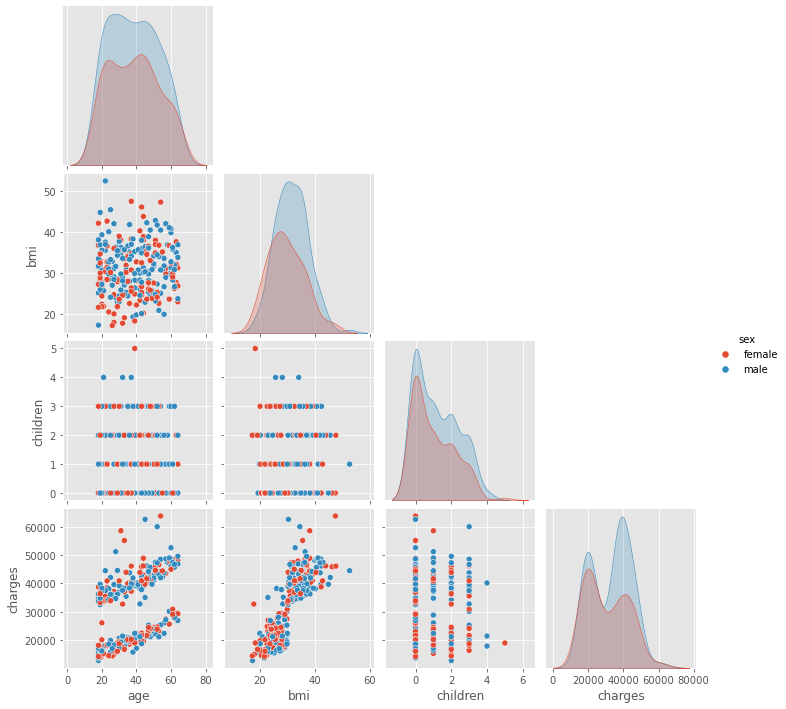

In [93]:
# Melihat hubungan antar variabel dari seorang perokok
sns.pairplot(data.loc[data.smoker == 'yes'], hue='sex', corner=True)
plt.show()

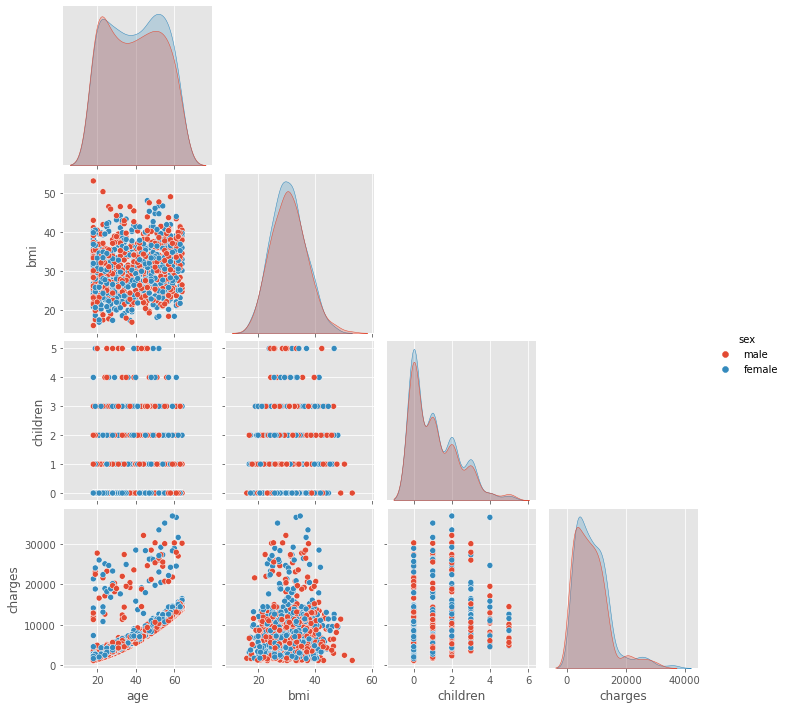

In [94]:
# Melihat hubungan antar variabel non perokok
sns.pairplot(data.loc[data.smoker == 'no'],hue='sex', corner=True)
plt.show()

In [95]:
# Filter data berdasarkan perokok dan non perokok
data_perokok = data.loc[data.smoker == 'yes'].reset_index()
data_non_perokok = data.loc[data.smoker == 'no'].reset_index()

In [96]:
def smoker_boxplot(data1, data2, data3, column):
    """
    data1 : dataframe Original
    data2 : dataframe perokok
    data3 : dataframe non perokok
    column : column name (str)
    """
    fig, ax = plt.subplots(1,3, sharey='row', figsize=(10,8))
    sns.stripplot(
    ax = ax[0],
    data = data1[column],
    color = 'red')
    sns.boxplot(
    ax = ax[0],
    data = data1[column],
    color = 'yellow')
    ax[0].set_ylabel('{}'.format(column))
    ax[0].set_title('Boxplot {} (All)\n Median: {} \n'.format(column, int(np.median(data1[column]))))
    
    
    sns.stripplot(
    ax = ax[1],
    data = data2[column],
    color = 'red')
    sns.boxplot(
    ax = ax[1],
    data = data2[column],
    color = 'yellow')
    ax[1].set_ylabel('{}'.format(column))
    ax[1].set_title('Boxplot {} (Perokok)\n Median: {} \n'.format(column, int(np.median(data2[column]))))
    
    
    sns.stripplot(
    ax = ax[2],
    data = data3[column],
    color = 'red')
    sns.boxplot(
    ax = ax[2],
    data = data3[column],
    color = 'yellow')
    ax[2].set_ylabel('{}'.format(column))
    ax[2].set_title('Boxplot {} (Non Perokok)\n Median: {} \n'.format(column, int(np.median(data3[column]))))
    plt.tight_layout()
    plt.show()

In [97]:
def heatmap_korelasi(dataframe, column1, column2):
    """
    dataframe : dataframe
    column1 : Nama kolom yang akan dilihat korelasinya (str)
    column2 : Nama kolom yang akan dilihat korelasinya (str)
    """
    corr = dataframe[[column1, column2]].corr()
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(f"Korelasi antara {column1} dan {column2}")
    plt.show()

In [98]:
def sebaran_data(data, x, y):
    """
    data : dataframe
    x : kolom x
    y : kolom y
    """
    plt.scatter(data[x], data[y])
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'Sebaran data {x} vs {y}')
    plt.show()

## 4.1 Boxplot All

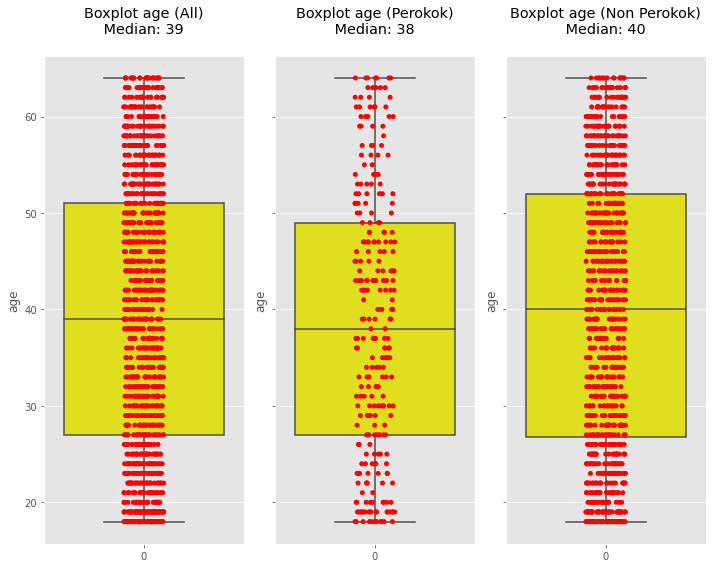

In [99]:
# Boxplot Umur
smoker_boxplot(data, data_perokok, data_non_perokok, 'age')

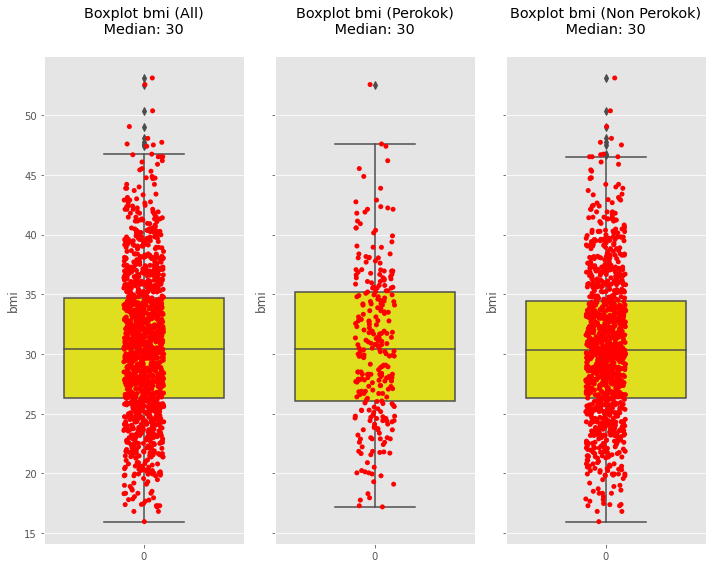

In [100]:
# Boxplot bmi
smoker_boxplot(data, data_perokok, data_non_perokok, 'bmi')

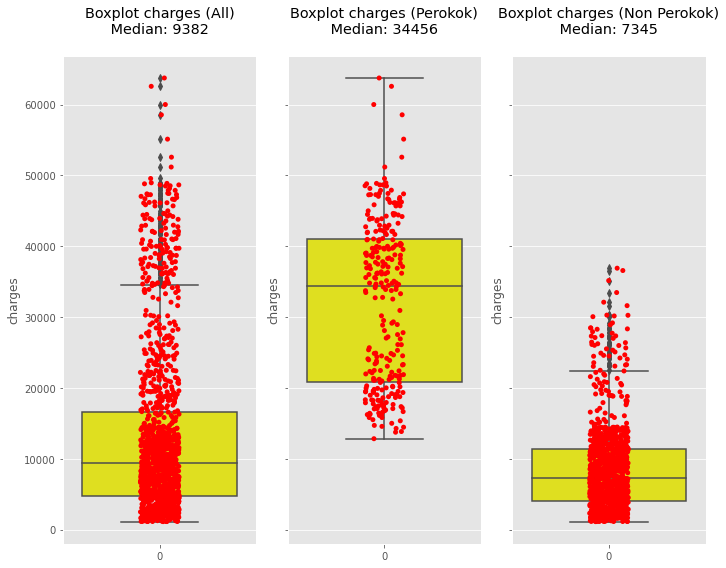

In [101]:
# Boxplot charges
smoker_boxplot(data, data_perokok, data_non_perokok, 'charges')

## 4.2 Correlasi Perokok

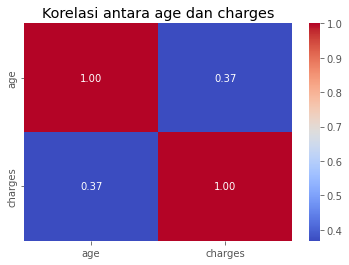

In [102]:
# Korelasi umur dan tagihan seorang perokok
corr_smoker_age_charges = heatmap_korelasi(data_perokok, 'age', 'charges')

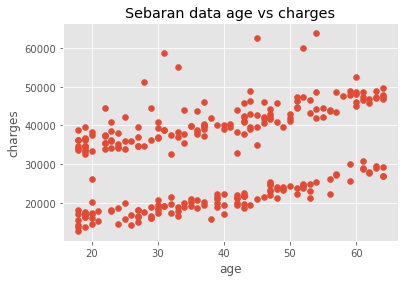

In [103]:

# Melihat sebaran umur dan tagihan seorang perokok
sebaran_data(data_perokok, 'age', 'charges')

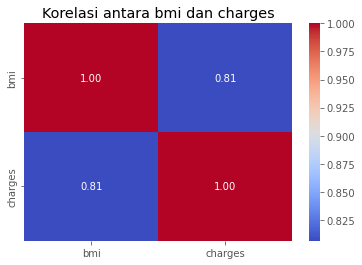

In [104]:
# Korelasi bmi dan tagihan seorang perokok
corr_smoker_bmi_charges = heatmap_korelasi(data_perokok, 'bmi', 'charges')

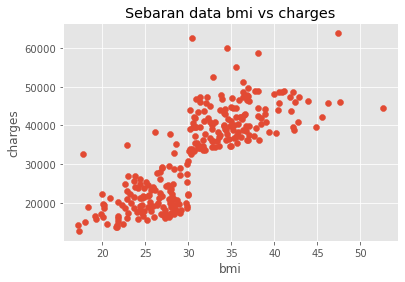

In [105]:
# Sebaran data bmi dan tagihan seorang perokok
sebaran_data(data_perokok, 'bmi', 'charges')

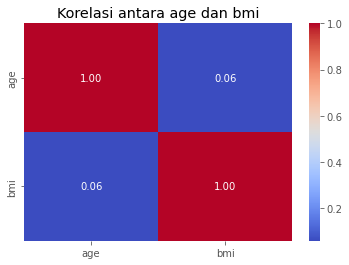

In [106]:
# Korelasi umur dan bmi seorang perokok
corr_smoker_age_bmi = heatmap_korelasi(data_perokok, 'age', 'bmi')

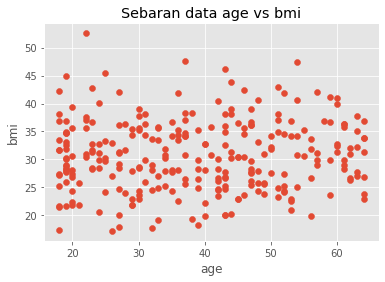

In [107]:
# Sebaran umur dan bmi seorang perokok
sebaran_data(data_perokok, 'age', 'bmi')

## 4.3 Correlasi Non-Perokok

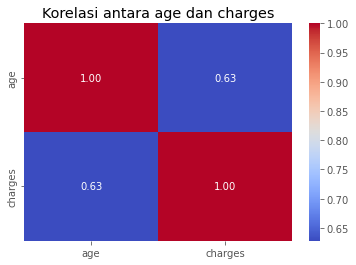

In [108]:
corr_non_smoker_age_charges = heatmap_korelasi(data_non_perokok, 'age', 'charges')

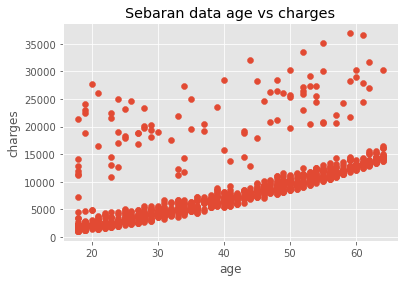

In [109]:
sebaran_data(data_non_perokok, 'age', 'charges')

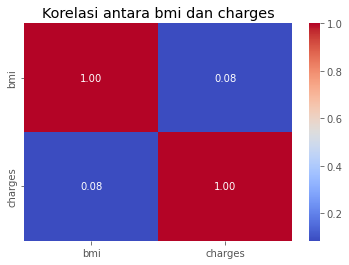

In [110]:
corr_non_smoker_bmi_charges = heatmap_korelasi(data_non_perokok, 'bmi', 'charges')

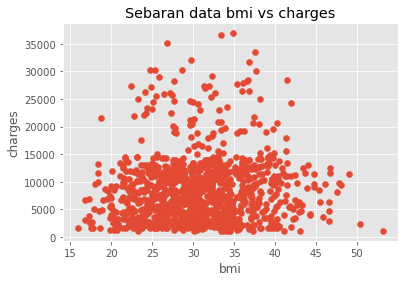

In [111]:
sebaran_data(data_non_perokok, 'bmi', 'charges')

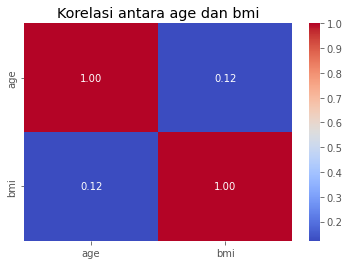

In [112]:
corr_non_smoker_age_bmi = heatmap_korelasi(data_non_perokok, 'age', 'bmi')

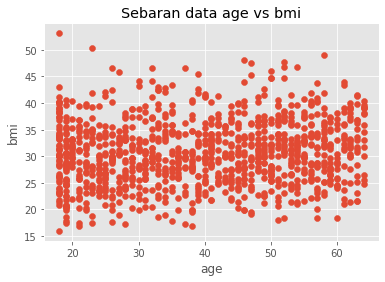

In [113]:

sebaran_data(data_non_perokok, 'age', 'bmi')

## 4.4 Female and Male

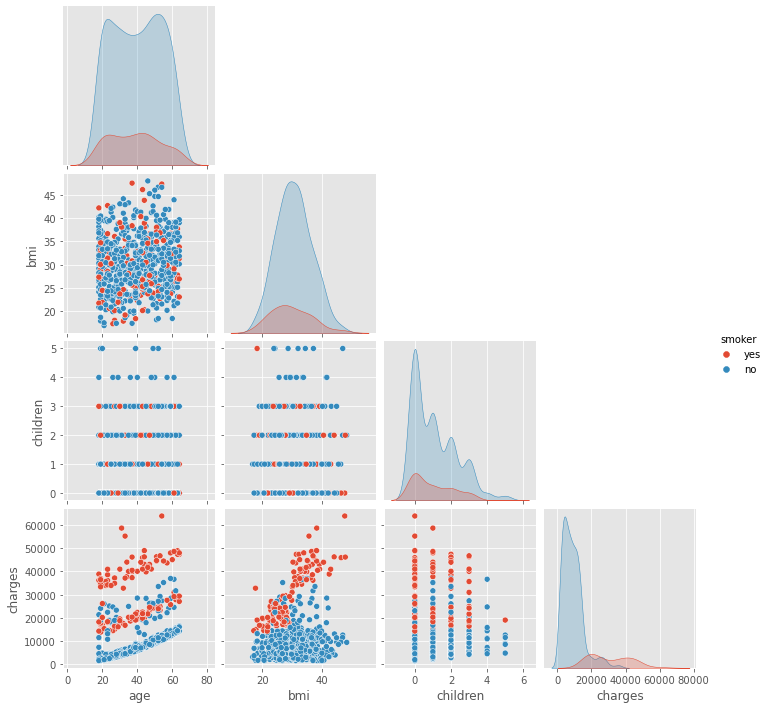

In [114]:
sns.pairplot(data.loc[data.sex == 'female'], hue='smoker', corner=True);

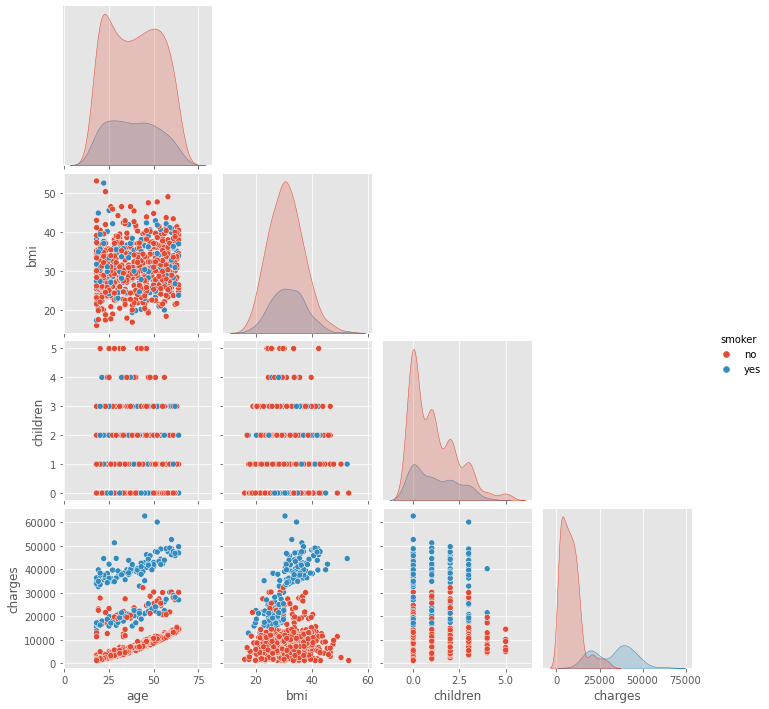

In [115]:
sns.pairplot(data.loc[data.sex == 'male'], hue='smoker', corner=True);

# 5 - Pengujian Hipotesis

Langkah terakhir, kita cari apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis
tentang tagihan kesehatan. Anda wajib mengecek 3 hipotesis tentang karakter populasi dari
data. Hipotesis yang wajib uji adalah
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25

Satu hipotesis lain, anda bisa pilih salah satu hipotesis dibawah ini, atau anda dapat membuat
hipotesis lainnya
1. BMI laki-laki dan perempuan sama
2. Tagihan kesehatan laki-laki lebih besar dari perempuan
3. Proporsi perokok berbeda di tiap region

## 5.1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

$$H_0: \nu_1 \leq \nu_2 $$
$$H_1: \nu_1 > \nu_2 $$

dimana:

$\nu_1 :$ tagihan perokok
$\newline$
$\nu_2 :$ tagihan non perokok

#### T-test

In [116]:
x1 = data.loc[data['smoker'] == 'yes', 'charges'].sample(30)
x2 = data.loc[data['smoker'] == 'no', 'charges'].sample(30)

x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

In [117]:
alpha = 0.05

In [118]:
print(np.mean(x1))
print(np.mean(x2))

32768.104563
10001.861579333334


In [119]:
print(f"Varians x1: {np.var(x1)}, Varians x2: {np.var(x2)}")

Varians x1: 135042507.86685488, Varians x2: 60706027.32473335


In [120]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(a=x1, b=x2, equal_var=False, alternative='two-sided')

In [121]:
if p_value < alpha:
    print('Reject Null Hypothesis: charges for smokers are statistically more significant than charges for non-smokers: {}'.format(p_value))
else:
    print('Fail to Reject Null Hypothesis: charges for smokers are either statistically equal to or less charges for non-smokers: %.8f' % p_value)

Reject Null Hypothesis: charges for smokers are statistically more significant than charges for non-smokers: 1.0030103768122776e-11


Z-test

In [122]:
from scipy import stats
from statsmodels.stats import weightstats

x1 = data.loc[data['smoker'] == 'yes', 'charges']
x2 = data.loc[data['smoker'] == 'no', 'charges']

x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

z_test, p_value_z = weightstats.ztest(x1, x2, value=0, alternative='two-sided')

if p_value_z < alpha:
    print('Reject Null Hypothesis: charges for smokers are statistically more significant than charges for non-smokers: {}'.format(p_value_z))
else:
    print('Fail to Reject Null Hypothesis: charges for smokers are either statistically equal to or less charges for non-smokers: {}'.format(p_value_z))

Reject Null Hypothesis: charges for smokers are statistically more significant than charges for non-smokers: 0.0


### 5.2 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

$$H_0: {BMI}_1 \leq {BMI}_2 $$
$$H_1: {BMI}_1 > {BMI}_2 $$

dimana:

${BMI}_1 :$ tagihan kesehatan dengan BMI di atas 25
$\newline$
${BMI}_2 :$ tagihan kesehatan dengan BMI di bawah 25

In [123]:
x_above_25 = data.loc[data['bmi'] > 25, 'charges'].sample(30)
x_below_25 = data.loc[data['bmi'] < 25, 'charges'].sample(30)

x_above_25.reset_index(drop=True, inplace=True)
x_below_25.reset_index(drop=True, inplace=True)

In [124]:
print(f"Varians BMI di atas 25: {np.var(x_above_25):.2f} \nVarians BMI di bawah 25: {np.var(x_below_25):.2f}")

Varians BMI di atas 25: 248116667.36 
Varians BMI di bawah 25: 58959452.10


In [125]:
alpha = 0.05

stat_2, p_value_2 = ttest_ind(x_above_25, x_below_25, equal_var=False, alternative='two-sided')

In [126]:
if p_value_2 < alpha:
    print('Reject Null Hypothesis: Charges with BMI greater than 25 are statistically siginifican than charges with BMI less than 25: {}'.format(p_value_2))
else:
    print('Fail to Reject Null Hypothesis: Charges with BMI greater than 25 are either statistically equal to or less than charges with BMI less than 25: {}'.format(p_value_2))

Reject Null Hypothesis: Charges with BMI greater than 25 are statistically siginifican than charges with BMI less than 25: 0.046662692243718495


Z-test

In [127]:
x_above_25 = data.loc[data['bmi'] > 25, 'charges']
x_below_25 = data.loc[data['bmi'] < 25, 'charges']

x_above_25.reset_index(drop=True, inplace=True)
x_below_25.reset_index(drop=True, inplace=True)

z_test, p_value_z = weightstats.ztest(x_above_25, x_below_25, value=0, alternative='two-sided')

if p_value_z < alpha:
    print('Reject Null Hypothesis: Charges with BMI greater than 25 are statistically siginifican than charges with BMI less than 25: {}'.format(p_value_z))
else:
    print('Fail to Reject Null Hypothesis: Charges with BMI greater than 25 are either statistically equal to or less than charges with BMI less than 25: {}'.format(p_value_z))

Reject Null Hypothesis: Charges with BMI greater than 25 are statistically siginifican than charges with BMI less than 25: 1.6696009913510223e-05


In [128]:
x_above_25.mean()

13946.476035324473

In [129]:
x_below_25.mean()

10282.224474367347

### 5.3 BMI laki-laki dan perempuan sama

$$H_0: \alpha_1 = \alpha_2 $$
$$H_1: \alpha_1 \neq \alpha_2 $$

dimana:

$\alpha_1 :$ BMI Perempuan
$\newline$
$\alpha_2 :$ BMI Laki-laki

In [130]:
x_female = data.loc[data['sex'] == 'female', 'bmi'].sample(30)
x_male = data.loc[data['sex'] == 'male', 'bmi'].sample(30)

x_female.reset_index(drop=True, inplace=True)
x_male.reset_index(drop=True, inplace=True)

In [131]:
print(f"Varians BMI perempuan: {np.var(x_female):.2f} \nVarians BMI laki-laki: {np.var(x_male):.2f}")

Varians BMI perempuan: 46.57 
Varians BMI laki-laki: 32.54


In [132]:
alpha = 0.05

stat_3, p_value_3 = ttest_ind(x_female, x_male, equal_var=False, alternative='two-sided')

In [133]:
if p_value_3 < alpha:
    print('Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males: {}'.format(p_value_3))
else:
    print('Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different: {}'.format(p_value_3))

Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different: 0.7425725257435256


Z-test

In [134]:
x_female = data.loc[data['sex'] == 'female', 'bmi']
x_male = data.loc[data['sex'] == 'male', 'bmi']

x_female.reset_index(drop=True, inplace=True)
x_male.reset_index(drop=True, inplace=True)

z_test, p_value_z = weightstats.ztest(x_female, x_male, value=0, alternative='two-sided')

if p_value_z < alpha:
    print('Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males: {}'.format(p_value_z))
else:
    print('Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different: {}'.format(p_value_z))

Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different: 0.08974343679943912


In [135]:
x_female.mean()

30.37774924471299

In [136]:
x_male.mean()

30.943128698224854